# From a tif file

In [13]:
dir_tif = '/Users/arthurcalvi/Data/fordead_data-main/fordead_data-main-update_study_area/study_area_s1_desc/20190912_S1A_GRD_desc_37_DDB3/20190912_S1A_GRD_desc_37_DDB3_iw-vv.tif'

import rasterio
import geopandas as gpd

# Read the raster
with rasterio.open(dir_tif) as src:
    # Read the raster values within
    array = src.read(1)

# Convert bound of the src to shapely polygon
bound = src.bounds
from shapely.geometry import box
poly = box(bound[0], bound[1], bound[2], bound[3])

# Convert the poly to a geodataframe with the right crs
gdf = gpd.GeoDataFrame({'geometry': poly}, index=[0], crs=src.crs).to_crs('EPSG:4326')


In [16]:
#to geojson
outdir = '/Users/arthurcalvi/Data/disturbances-ex/france_GrandEst'
import os
os.makedirs(outdir, exist_ok=True)
gdf.to_file(os.path.join(outdir, 'scolyte.geojson'), driver='GeoJSON')

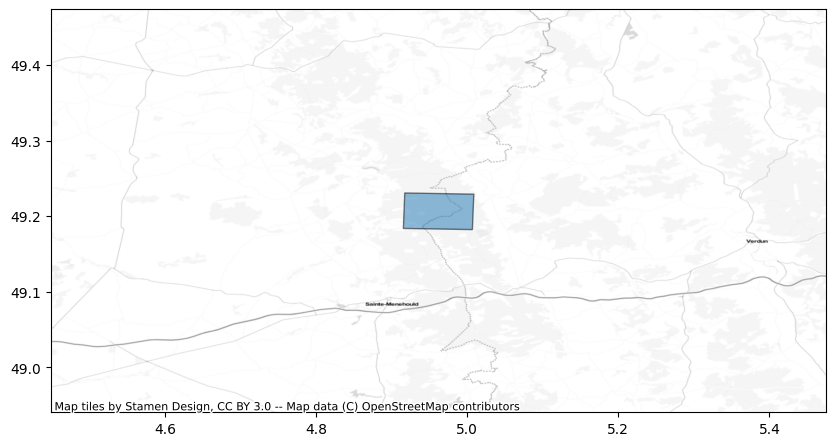

In [10]:
#add base map with contexily

import contextily as ctx
import matplotlib.pyplot as plt

# Plot the raster with the bounds of the shapefile
#plot with a buffer arround the gdf
fig, ax = plt.subplots(figsize=(10, 10))

#set limit of the axes according to the gdf and by increasing the bbox 
xbuffer = (gdf.total_bounds[2] - gdf.total_bounds[0]) * 5
ybuffer = (gdf.total_bounds[3] - gdf.total_bounds[1]) * 5

ax.set_xlim(gdf.total_bounds[0] - xbuffer, gdf.total_bounds[2] + xbuffer)
ax.set_ylim(gdf.total_bounds[1] - ybuffer, gdf.total_bounds[3] + ybuffer)

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Stamen.TonerLite)



